<img style="float: left; margin: 30px 15px 15px 15px;" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTFzQj91sOlkeDFkg5HDbjtR4QJYmLXkfMNig&usqp=CAU" width="400" height="500" /> 
    
    
### <font color='navy'> Modelos no lineales para pronósticos. 

**Nombres:** Javier Alejandro Contreras Figueroa, Ricardo Damián Hernández Ramírez

**Fecha:** 07 de marzo del 2024.

**Expediente** : 739708,740356
    
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: https://github.com/JavierFigueroa21/Tarea_4_JAContreras_RDHernandez

# Tarea 4: Ejercicio de la Clase 11

## Enunciado de tarea 
Las muestras contienen 12 atributos de casas en diferentes lugares alrededor del suburbios de Boston a fines de la década de 1970. Los objetivos son los valores medios de las casas en un lugar (en k$).

Los atributos mismos se definen en el [Sitio web de StatLib](http://lib.stat.cmu.edu/datasets/boston).
El diccionario de datos es el siguiente:

        CRIM: Per capita crime rate by town
        ZN: Proportion of residential land zoned for lots over 25,000 sq. ft
        INDUS: Proportion of non-retail business acres per town
        CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        NOX: Nitric oxide concentration (parts per 10 million)
        RM: Average number of rooms per dwelling
        AGE: Proportion of owner-occupied units built prior to 1940
        DIS: Weighted distances to five Boston employment centers
        RAD: Index of accessibility to radial highways
        TAX: Full-value property tax rate per $10,000
    PTRATIO: Pupil-teacher ratio by town
    LSTAT: Percentage of lower status of the population
    MEDV: Median value of owner-occupied homes in $1000s
    
El objetivo para es este dataset es el siguiente:
1. Construir una red neuronal MLP univariada. Para esto, escoger la variable que más tenga correlación con la variable de salida.
2. Construir una red neuronal MLP multivariada. Para esto, tomar todas las variables incluidas en nuestro dataset.
3. Construir una red neuronal MLP multivariada, pero en este caso sólo considerar las variables adecuadas y descartar aquellas que no aportan mucha información o que son redundantes para cuantificar el efecto de estas variables redundantes.

**Nota**: Para poder saber cuales variables incluir en el modelo y cuales rechazar una opción es analizar la correlación de pearson y la otra usando pruebas estadísiticas con las siguientes paqueterías
```
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
```
> Luego del paso 3, crear el mismo modelo pero en este caso implementar técnicas de regularización `EarlyStoppin` y `dropout`. Investigar como se pueden implementar estas estrategias en tensorflow.


## Ejercicio 1: Construir una red neuronal MLP multivariada. Para esto, tomar todas las variables incluidas en nuestro dataset.

## Solución estudiante 1

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn

# Cargar los datos de entrenamiento y prueba
(train_data, train_labels), (test_data, test_labels) = keras.datasets.boston_housing.load_data()

2024-03-07 16:42:18.973472: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-07 16:42:19.025875: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-07 16:42:19.025928: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-07 16:42:19.027052: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-07 16:42:19.033975: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-07 16:42:19.035229: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [2]:
train_data.shape, test_data.shape

((404, 13), (102, 13))

In [3]:
train_data[0:3,-4:]

array([[307.  ,  21.  , 396.9 ,  18.72],
       [348.  ,  14.7 , 395.38,   3.11],
       [666.  ,  20.2 , 375.52,   3.26]])

In [4]:
# Obviar la columna -2 por que considera una variable de poco interés
np.delete(train_data, -2, axis=1)[0:3,-4:]

array([[  4.  , 307.  ,  21.  ,  18.72],
       [  2.  , 348.  ,  14.7 ,   3.11],
       [ 24.  , 666.  ,  20.2 ,   3.26]])

In [5]:
train_data = np.delete(train_data, -2, axis=1)
test_data = np.delete(test_data, -2, axis=1)

In [6]:
# Analizar la data completa
columns = [
    'CRIM',
    'ZN',
    'INDUS',
    'CHAS',
    'NOX',
    'RM',
    'AGE',
    'DIS',
    'RAD',
    'TAX',
    'PTRATIO',
    'LSTAT',
    'MEDV',
]

X = np.vstack([train_data, test_data])
y = np.hstack([train_labels, test_labels]).reshape(-1, 1)
data = pd.DataFrame(np.concatenate((X, y), axis=1), columns=columns)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,18.72,15.2
1,0.02177,82.5,2.03,0.0,0.415,7.610,15.7,6.2700,2.0,348.0,14.7,3.11,42.3
2,4.89822,0.0,18.10,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,3.26,50.0
3,0.03961,0.0,5.19,0.0,0.515,6.037,34.5,5.9853,5.0,224.0,20.2,8.01,21.1
4,3.69311,0.0,18.10,0.0,0.713,6.376,88.4,2.5671,24.0,666.0,20.2,14.65,17.7


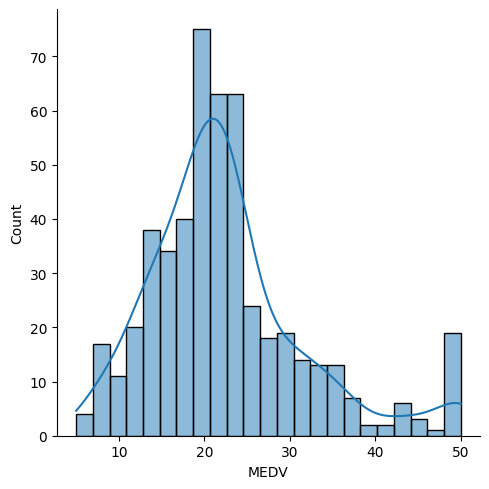

In [7]:
#EDA
# Graficar la distribución de la salida (precios de viviendas) sn.distplot -> kde
sn.displot(data, x='MEDV', kde=True)

In [8]:
data.corr().round(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,0.46,-0.39
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,-0.41,0.36
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,0.60,-0.48
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,-0.05,0.18
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,0.59,-0.43
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,-0.61,0.70
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,0.60,-0.38
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,-0.50,0.25
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,0.49,-0.38
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,0.54,-0.47


<Axes: >

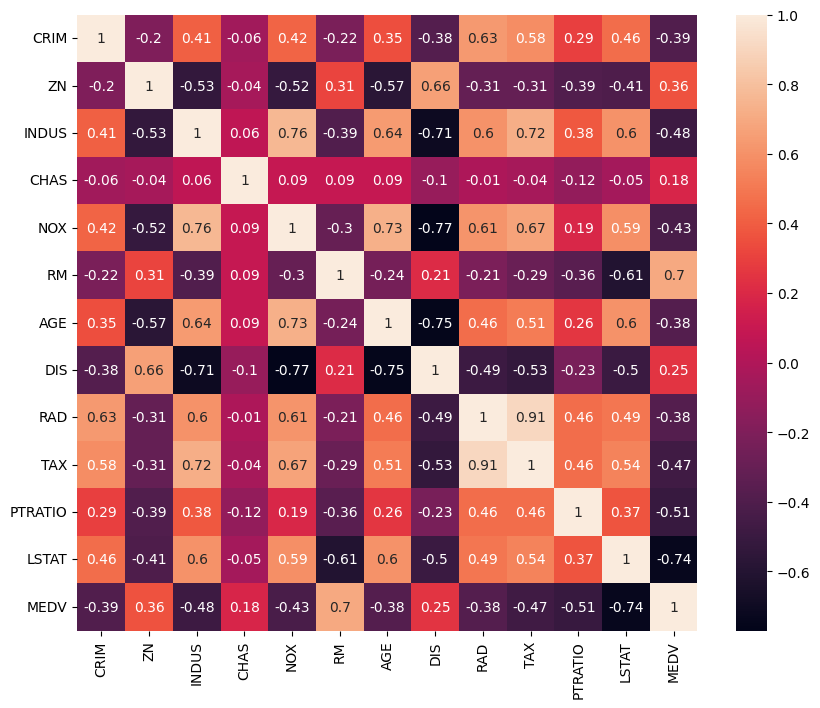

In [9]:
# Análisis de correlación (selección de features) heatmap -> annot
corr = data.corr().round(2)

fig, ax = plt.subplots(1,1, figsize=(10, 8))
sn.heatmap(corr, annot=True, ax=ax)

<Axes: xlabel='RM', ylabel='MEDV'>

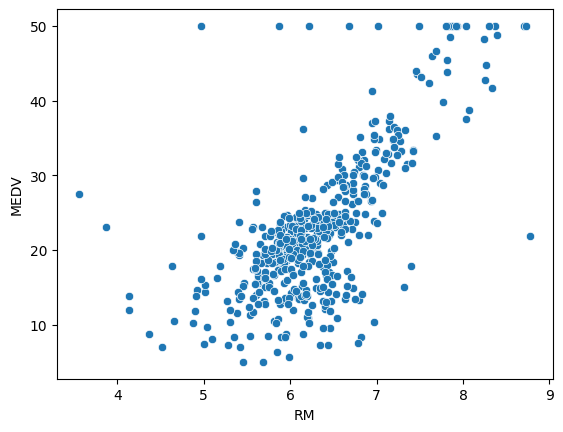

In [10]:
# Realizar un scatterplot entre la variables seleccionadas sn.scatterplot -> data, x, y
features_cols = ['RM']
output_col = ['MEDV']

sn.scatterplot(data, x=features_cols[0], y=output_col[0])

<Axes: >

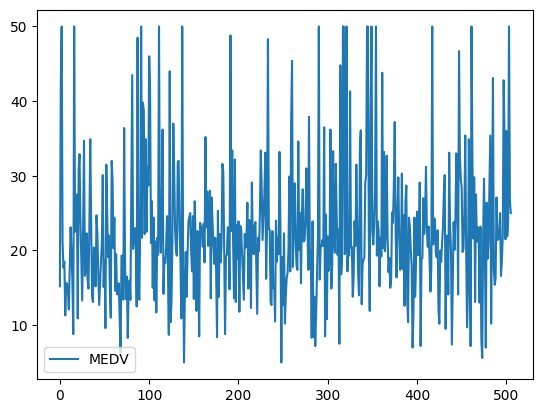

In [11]:
# Graficar la salida en el tiempo
data[output_col].plot()

<Axes: >

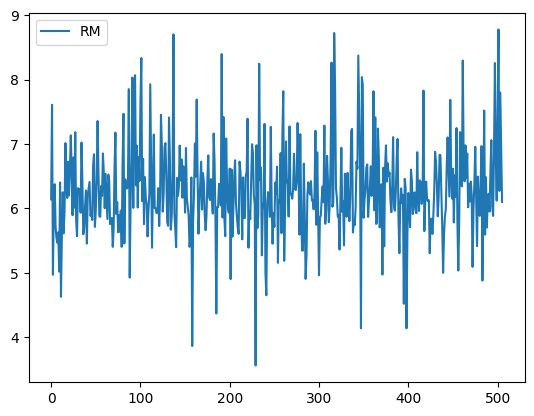

In [12]:
# Gráfica de las características en el tiempo
data[features_cols].plot()

In [13]:
data['log_rm'] = np.log(data['RM'])
data['log_medv'] = np.log(data['MEDV'])

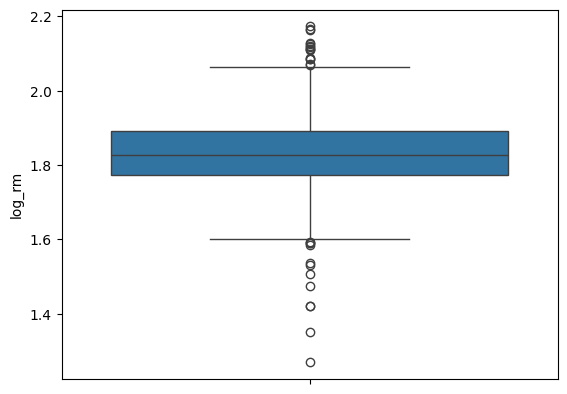

<Axes: ylabel='log_medv'>

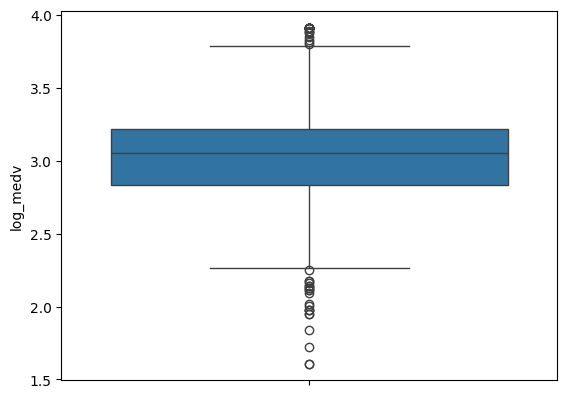

In [14]:
sn.boxplot(data, y='log_rm')
plt.show()
sn.boxplot(data, y='log_medv')

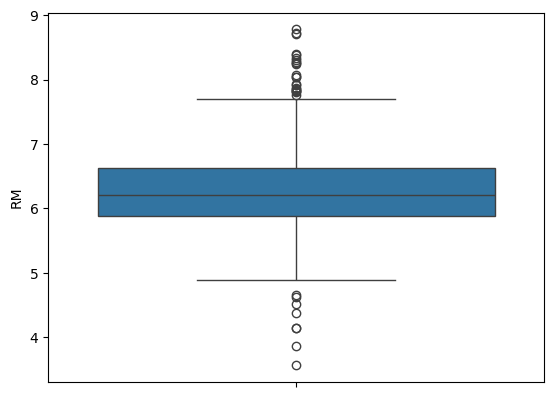

<Axes: ylabel='MEDV'>

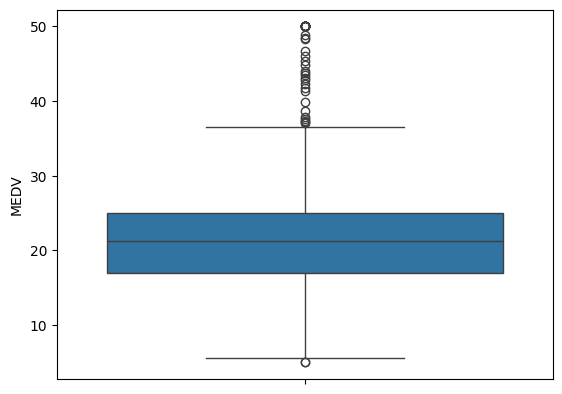

In [15]:
# Analizar outliers sn.boxplot -> data, y
sn.boxplot(data, y=features_cols[0])
plt.show()
sn.boxplot(data, y=output_col[0])

In [16]:
# Remover outliers
def remove_outliers(df:pd.DataFrame, column:str):
    df = df.copy()
    q1, q3 = np.percentile(df[column], [25, 75])
    iqr = q3 - q1
    ub = q3 + 1.5 * iqr
    lb = q1 - 1.5 * iqr
    
    df = df.query(f'{lb}<= {column} <= {ub}')
#     df = df[(df[column] <= ub) & (df[column] >= lb)]
    return df

In [17]:
# Remover outliers en base a los datos de la salida
y_out = remove_outliers(data[features_cols + output_col], output_col[0])
print(y_out.shape)

# Remover outliers resultantes del paso anterior para datos de features
X_out = remove_outliers(y_out, features_cols[0])
print(X_out.shape)

# Seleccionar los datos resultantes
y_out = X_out[output_col].values
X_out = X_out[features_cols].values

(466, 2)
(452, 2)


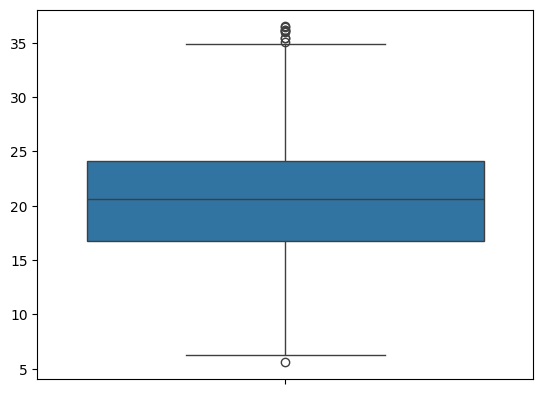

<Axes: >

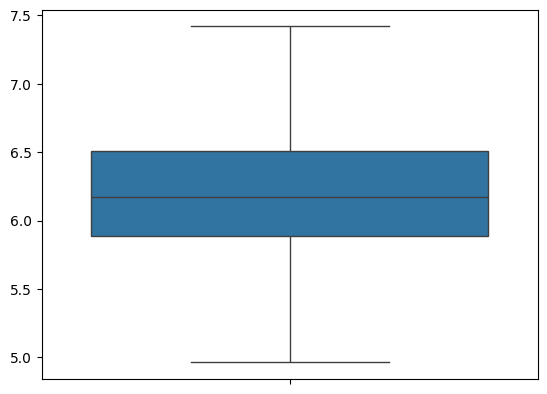

In [18]:
# Graficar los boxplots finales
#sn.boxplot(y=y_out)
#plt.show()
#sn.boxplot(y=X_out)

# Convertir las matrices en unidimensionales
y_out_flat = y_out.reshape(-1)
X_out_flat = X_out.reshape(-1)

# Graficar los boxplots finales
sn.boxplot(y=y_out_flat)
plt.show()
sn.boxplot(y=X_out_flat)

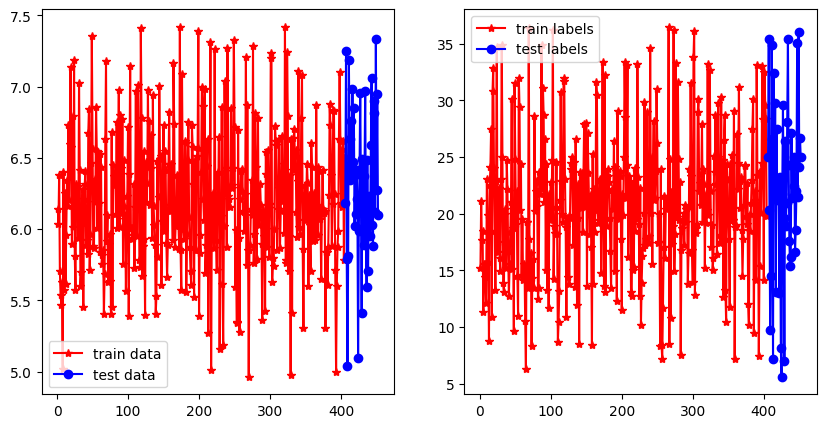

In [19]:
# Visualizo datos de entrenamiento y de prueba
TEST_SIZE = int(0.2 * data.shape[0])
TRAIN_SIZE = data.shape[0] - TEST_SIZE

t = np.arange(1, X_out.shape[0] + 1)
train_data, test_data = X_out[:TRAIN_SIZE], X_out[TRAIN_SIZE:]
train_labels, test_labels = y_out[:TRAIN_SIZE], y_out[TRAIN_SIZE:]

fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].plot(t[:TRAIN_SIZE], train_data, 'r*-', label='train data')
ax[0].plot(t[TRAIN_SIZE:], test_data, 'bo-', label='test data')
ax[0].legend()

ax[1].plot(t[:TRAIN_SIZE], train_labels, 'r*-', label='train labels')
ax[1].plot(t[TRAIN_SIZE:], test_labels, 'bo-', label='test labels')
plt.legend()

In [20]:
# Normalizar los datos de entrenamiento y prueba
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)
train_data = (train_data - mean) / std
test_data = (test_data - mean) / std

In [21]:
# Poner una semilla para replicar resultados
tf.random.set_seed(456)

# Definir la arquitectura de la red neuronal
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                128       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4353 (17.00 KB)
Trainable params: 4353 (17.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
# Compilar el modelo
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

# Entrenar el modelo
# argumentos: validation_split, shuffle, epochs, verbose
model_fit = model.fit(
    train_data, train_labels, 
    validation_split=0.2, 
    shuffle=False,
    epochs=200, 
    batch_size=32, 
    verbose=0
)

# Evaluar el modelo en el conjunto de prueba
test_mse_score, test_mae_score = model.evaluate(test_data, test_labels)
print('Error cuadrático medio en el conjunto de prueba:', test_mse_score)
print('Error absoluto medio en el conjunto de prueba:', test_mae_score)

2/2 [==============================] - 0s 6ms/step - loss: 29.2302 - mae: 4.1661
Error cuadrático medio en el conjunto de prueba: 29.230215072631836
Error absoluto medio en el conjunto de prueba: 4.16605281829834


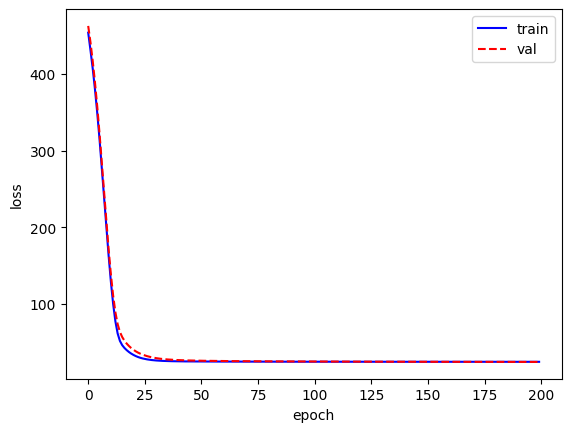

In [23]:
# Graficar el loss del conjunto de entrenamiento y de validación
plt.plot(model_fit.history['loss'], 'b', label='train')
plt.plot(model_fit.history['val_loss'], 'r--', label='val')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()

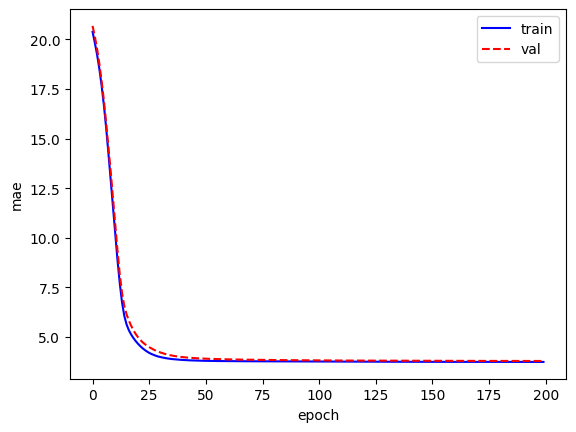

In [24]:
# Graficar métricas de error
plt.plot(model_fit.history['mae'], 'b', label='train')
plt.plot(model_fit.history['val_mae'], 'r--', label='val')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend()

In [25]:
plt.figure(figsize=(10,5))
plt.plot(t[TRAIN_SIZE:], predicted, 'r*-', label='prediction')
plt.plot(t[TRAIN_SIZE:], test_labels, 'bo-', label='test labels')

plt.legend()

NameError: name 'predicted' is not defined

<Figure size 1000x500 with 0 Axes>

In [ ]:
## con todas
(train_data, train_labels), (test_data, test_labels) = keras.datasets.boston_housing.load_data()

In [ ]:
# Normalizar los datos de entrenamiento y prueba
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)
train_data = (train_data - mean) / std
test_data = (test_data - mean) / std

In [ ]:
# Plotear boxplots de todas las variables en un solo gráfico
plt.figure(figsize=(12, 6))
sn.boxplot(data=data)
plt.xticks(rotation=45)  # Rotar los nombres de las variables en el eje x para mayor legibilidad
plt.show()

In [ ]:
#outliers
# Remover outliers
def remove_outliers(df:pd.DataFrame, column:str):
    df = df.copy()
    q1, q3 = np.percentile(df[column], [25, 75])
    iqr = q3 - q1
    ub = q3 + 1.5 * iqr
    lb = q1 - 1.5 * iqr
    
    df = df.query(f'{lb}<= {column} <= {ub}')
#     df = df[(df[column] <= ub) & (df[column] >= lb)]
    return df

In [ ]:
# Poner una semilla para replicar resultados
tf.random.set_seed(456)

# Definir la arquitectura de la red neuronal
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)
])

model.summary()

In [ ]:
# Compilar el modelo
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

# Entrenar el modelo
# argumentos: validation_split, shuffle, epochs, verbose
model_fit = model.fit(
    train_data, train_labels, 
    validation_split=0.2, 
    shuffle=False,
    epochs=200, 
    batch_size=32, 
    verbose=0
)

# Evaluar el modelo en el conjunto de prueba
test_mse_score, test_mae_score = model.evaluate(test_data, test_labels)
print('Error cuadrático medio en el conjunto de prueba:', test_mse_score)
print('Error absoluto medio en el conjunto de prueba:', test_mae_score)

In [ ]:
# Graficar el loss del conjunto de entrenamiento y de validación
plt.plot(model_fit.history['loss'], 'b', label='train')
plt.plot(model_fit.history['val_loss'], 'r--', label='val')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()

In [ ]:
# Graficar métricas de error
plt.plot(model_fit.history['mae'], 'b', label='train')
plt.plot(model_fit.history['val_mae'], 'r--', label='val')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend()

## Solución estudiante 2

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# Cargar los datos de entrenamiento y prueba
(train_data, train_labels), (test_data, test_labels) = keras.datasets.boston_housing.load_data()
train_data = np.delete(train_data, -2, axis=1)
test_data = np.delete(test_data, -2, axis=1)

In [2]:
# Analizar la data completa
columns = [
    'CRIM',
    'ZN',
    'INDUS',
    'CHAS',
    'NOX',
    'RM',
    'AGE',
    'DIS',
    'RAD',
    'TAX',
    'PTRATIO',
    'LSTAT',
    'MEDV',
]

X = np.vstack([train_data, test_data])
y = np.hstack([train_labels, test_labels]).reshape(-1, 1)
data = pd.DataFrame(np.concatenate((X, y), axis=1), columns=columns)
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,18.72,15.2
1,0.02177,82.5,2.03,0.0,0.415,7.610,15.7,6.2700,2.0,348.0,14.7,3.11,42.3
2,4.89822,0.0,18.10,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,3.26,50.0
3,0.03961,0.0,5.19,0.0,0.515,6.037,34.5,5.9853,5.0,224.0,20.2,8.01,21.1
4,3.69311,0.0,18.10,0.0,0.713,6.376,88.4,2.5671,24.0,666.0,20.2,14.65,17.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,3.47428,0.0,18.10,1.0,0.718,8.780,82.9,1.9047,24.0,666.0,20.2,5.29,21.9
502,0.07896,0.0,12.83,0.0,0.437,6.273,6.0,4.2515,5.0,398.0,18.7,6.78,24.1
503,1.83377,0.0,19.58,1.0,0.605,7.802,98.2,2.0407,5.0,403.0,14.7,1.92,50.0
504,0.35809,0.0,6.20,1.0,0.507,6.951,88.5,2.8617,8.0,307.0,17.4,9.71,26.7


### Outliers

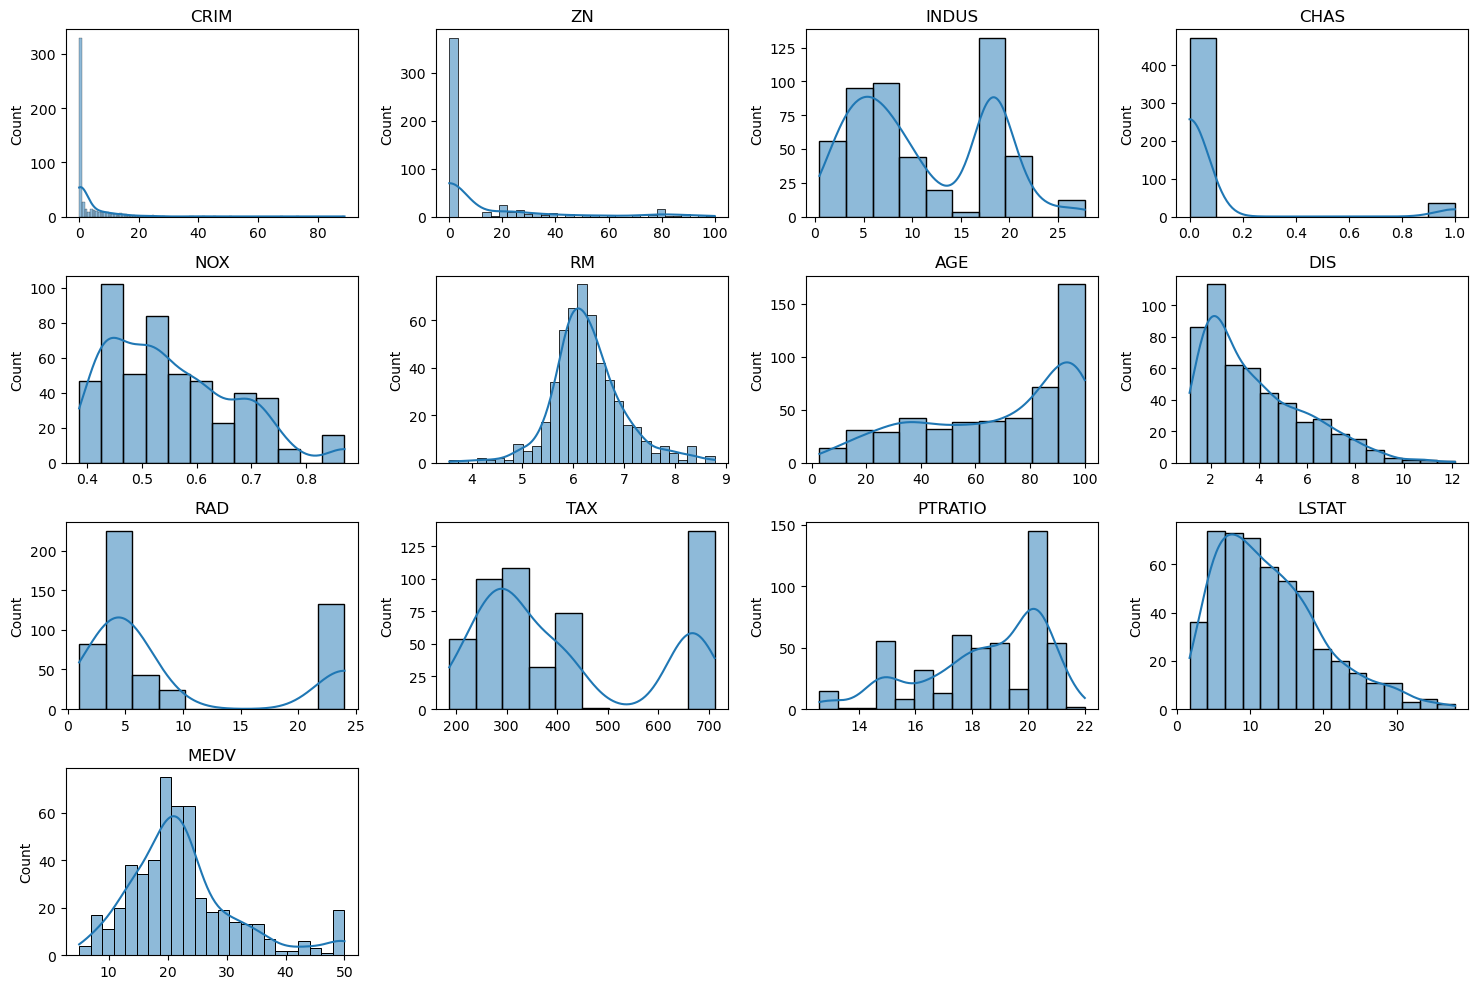

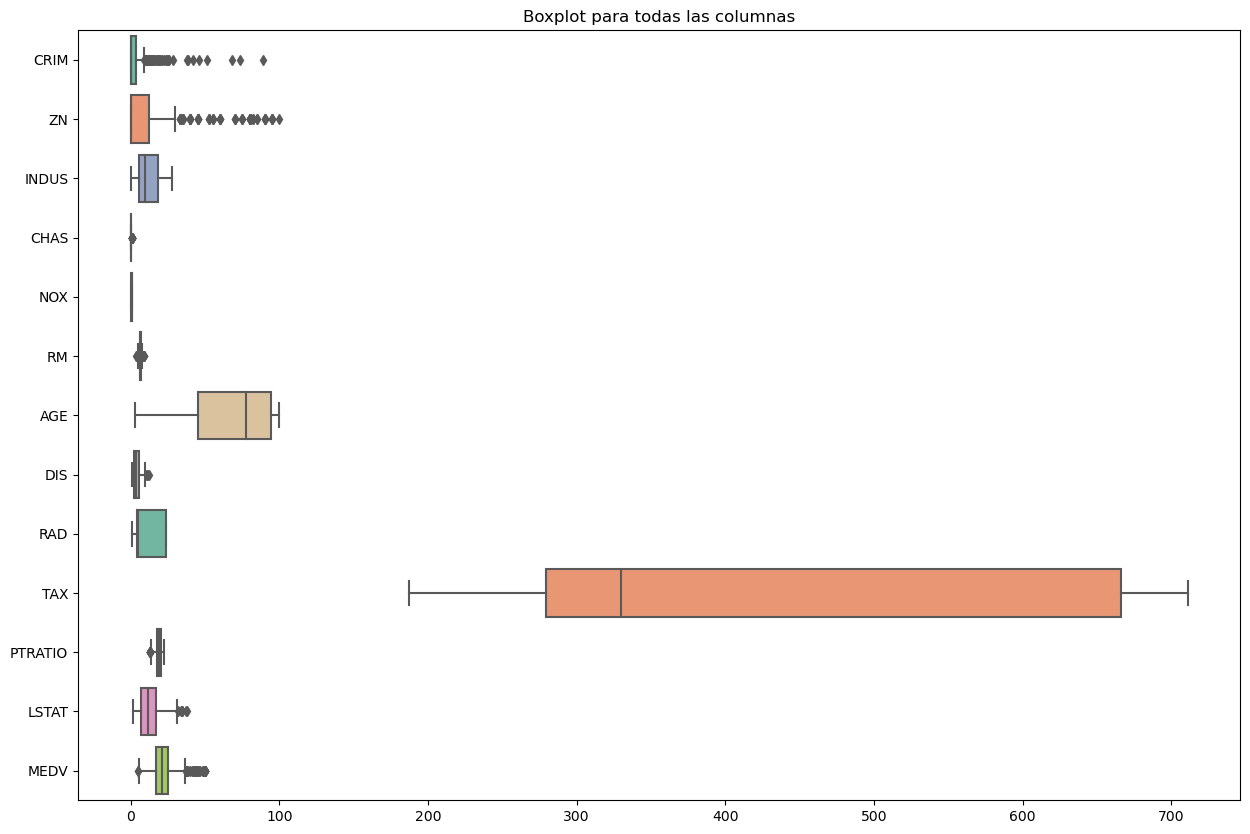

In [3]:
# Graficar histplot para todas las columnas
plt.figure(figsize=(15, 10))
for i, col in enumerate(columns):
    plt.subplot(4, 4, i+1)
    sns.histplot(data[col], kde=True)
    plt.title(col)
    plt.xlabel('')
plt.tight_layout()
plt.show()

# Graficar boxplot para todas las columnas
plt.figure(figsize=(15, 10))
sns.boxplot(data=data, orient="h", palette="Set2")
plt.title("Boxplot para todas las columnas")
plt.show()

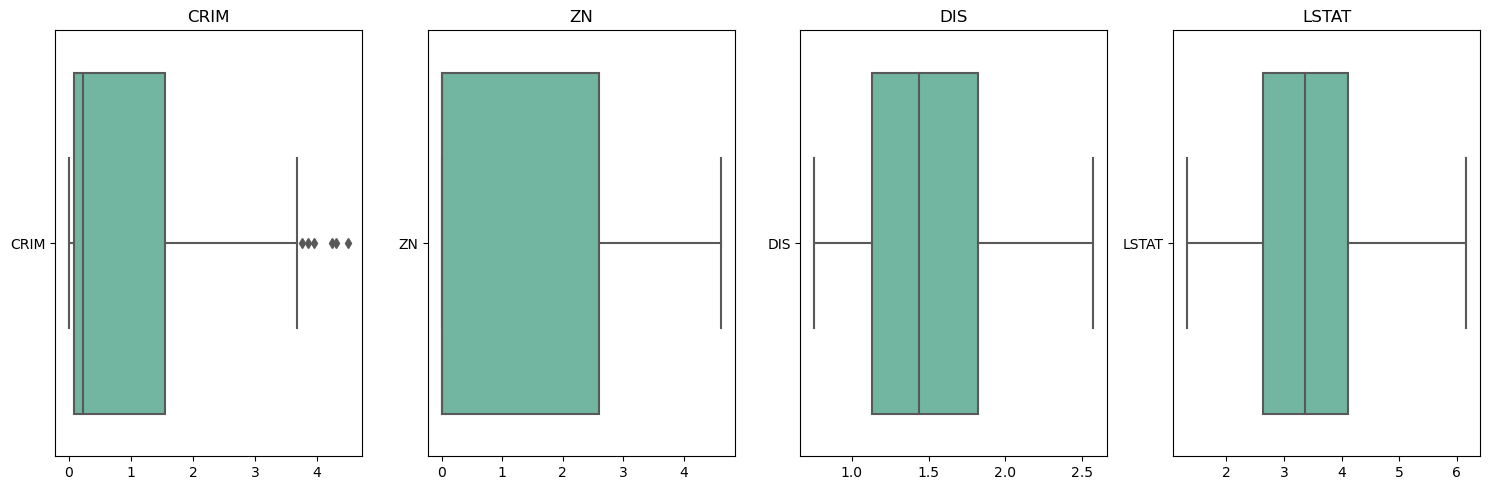

In [4]:
# Aplicar transformaciones directamente a las columnas originales
data['CRIM'] = np.log1p(data['CRIM'])  # Logaritmo natural más 1 para evitar errores con ceros
data['ZN'] = np.log1p(data['ZN'])
data['DIS'] = np.log1p(data['DIS'])
data['LSTAT'] = np.sqrt(data['LSTAT'])

# Graficar solo los boxplots de las transformaciones
plt.figure(figsize=(15, 5))

# Boxplot para CRIM
plt.subplot(1, 4, 1)
sns.boxplot(data=data[['CRIM']], orient="h", palette="Set2")
plt.title('CRIM')
plt.xlabel('')

# Boxplot para ZN
plt.subplot(1, 4, 2)
sns.boxplot(data=data[['ZN']], orient="h", palette="Set2")
plt.title('ZN')
plt.xlabel('')

# Boxplot para DIS
plt.subplot(1, 4, 3)
sns.boxplot(data=data[['DIS']], orient="h", palette="Set2")
plt.title('DIS')
plt.xlabel('')

# Boxplot para LSTAT
plt.subplot(1, 4, 4)
sns.boxplot(data=data[['LSTAT']], orient="h", palette="Set2")
plt.title('LSTAT')
plt.xlabel('')

plt.tight_layout()
plt.show()



Ahora se removeran los outliers de las variables RM y MEDV igual que en la clase 

In [5]:
# Remover outliers
def remove_outliers(df:pd.DataFrame, column:str):
    df = df.copy()
    q1, q3 = np.percentile(df[column], [25, 75])
    iqr = q3 - q1
    ub = q3 + 1.5 * iqr
    lb = q1 - 1.5 * iqr
    
    df = df.query(f'{lb}<= {column} <= {ub}')
#     df = df[(df[column] <= ub) & (df[column] >= lb)]
    return df

In [6]:
# Remover outliers en base a los datos de la salida
y_out = remove_outliers(data, 'MEDV')
print(y_out.shape)

# Remover outliers resultantes del paso anterior para datos de feature RM
X_out = remove_outliers(y_out, 'RM')
print(X_out.shape)

# Seleccionar los datos resultantes
y_out = X_out[['MEDV']].values
X_out = X_out.drop(columns='MEDV').values

(466, 13)
(452, 13)


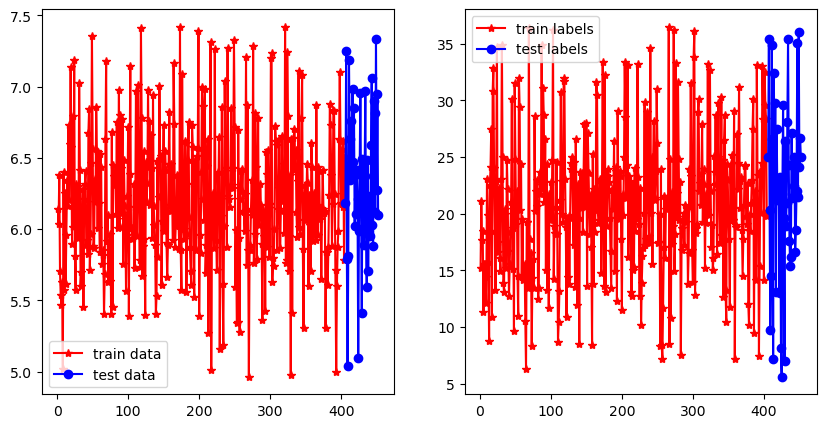

In [7]:
# Visualizo datos de entrenamiento y de prueba
TEST_SIZE = int(0.2 * data.shape[0])
TRAIN_SIZE = data.shape[0] - TEST_SIZE

t = np.arange(1, X_out.shape[0] + 1)
train_data, test_data = X_out[:TRAIN_SIZE], X_out[TRAIN_SIZE:]
train_labels, test_labels = y_out[:TRAIN_SIZE], y_out[TRAIN_SIZE:]


# Visualizazión unicamente de la variable 'RM' y 'MEDV'
fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].plot(t[:TRAIN_SIZE], train_data[:, 5], 'r*-', label='train data')
ax[0].plot(t[TRAIN_SIZE:], test_data[:, 5], 'bo-', label='test data')
ax[0].legend()

ax[1].plot(t[:TRAIN_SIZE], train_labels, 'r*-', label='train labels')
ax[1].plot(t[TRAIN_SIZE:], test_labels, 'bo-', label='test labels')
plt.legend()

plt.show()

In [8]:
# Normalizar los datos de entrenamiento y prueba
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)
train_data = (train_data - mean) / std
test_data = (test_data - mean) / std

In [11]:
# Poner una semilla para replicar resultados
tf.random.set_seed(123)

# Definir la arquitectura de la red neuronal
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                832       
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2945 (11.50 KB)
Trainable params: 2945 (11.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
# Compilar el modelo
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

# Entrenar el modelo
model_fit = model.fit(
    train_data, train_labels, 
    validation_split=0.2, 
    shuffle=False,
    epochs=50, 
    batch_size=32, 
    verbose=0
)

# Evaluar el modelo en el conjunto de prueba
test_mse_score, test_mae_score = model.evaluate(test_data, test_labels)
print('Error cuadrático medio en el conjunto de prueba:', test_mse_score)
print('Error absoluto medio en el conjunto de prueba:', test_mae_score)

2/2 [==============================] - 0s 7ms/step - loss: 17.3625 - mae: 3.0222
Error cuadrático medio en el conjunto de prueba: 17.362455368041992
Error absoluto medio en el conjunto de prueba: 3.022218704223633


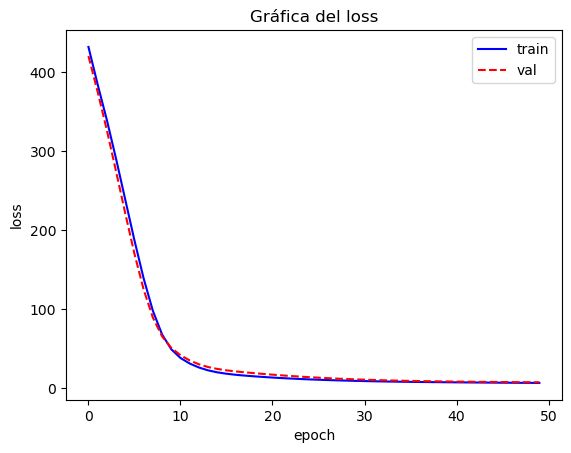

In [13]:
# Graficar el loss del conjunto de entrenamiento y de validación
plt.plot(model_fit.history['loss'], 'b', label='train')
plt.plot(model_fit.history['val_loss'], 'r--', label='val')
plt.title("Gráfica del loss")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()

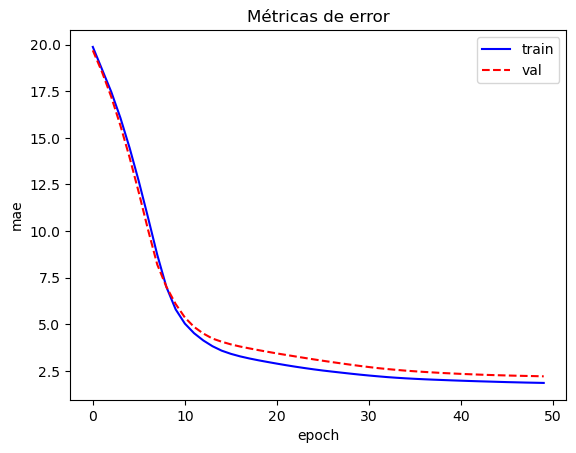

In [14]:
# Graficar métricas de error
plt.plot(model_fit.history['mae'], 'b', label='train')
plt.plot(model_fit.history['val_mae'], 'r--', label='val')
plt.title("Métricas de error")
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend()

### Ejercicio 2:Construir una red neuronal MLP multivariada, pero en este caso sólo considerar las variables adecuadas y descartar aquellas que no aportan mucha información o que son redundantes para cuantificar el efecto de estas variables redundantes.

Código de solución estudiante 1

In [26]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [27]:
(train_data, train_labels), (test_data, test_labels) = keras.datasets.boston_housing.load_data()

In [28]:
# Analizar la data completa
columns = [
    'CRIM',
    'ZN',
    'INDUS',
    'CHAS',
    'NOX',
    'RM',
    'AGE',
    'DIS',
    'RAD',
    'TAX',
    'PTRATIO',
    'B',
    'LSTAT',
    'MEDV',
]

X = np.vstack([train_data, test_data])
y = np.hstack([train_labels, test_labels]).reshape(-1, 1)
data = pd.DataFrame(np.concatenate((X, y), axis=1), columns=columns)

In [29]:
# Remover outliers en base a los datos de la salida
y_out = remove_outliers(data, 'MEDV')
print(y_out.shape)

# Remover outliers resultantes del paso anterior para datos de feature RM
X_out = remove_outliers(y_out, 'RM')
print(X_out.shape)

# Seleccionar los datos resultantes
y_out = X_out[['MEDV']].values
X_out = X_out.drop(columns='MEDV').values

(466, 14)
(452, 14)


In [30]:
print(f'Train:{train_data.shape}')
print(f'Test:{test_data.shape}')

Train:(404, 13)
Test:(102, 13)


In [31]:
# Normalizar los datos de entrenamiento y prueba
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)
train_data = (train_data - mean) / std
test_data = (test_data - mean) / std
# Poner una semilla para replicar resultados
tf.random.set_seed(456)

In [32]:
# Seleccionar las mejores x características
# La mitad de nuestras variables
selector = SelectKBest(score_func=f_regression, k=6)
X_new = selector.fit_transform(train_data, train_labels)

# Obtener los índices de las características seleccionadas
selected_features_indices = selector.get_support(indices=True)

names_columns = data.columns[selected_features_indices]
print(names_columns)

Index(['INDUS', 'NOX', 'RM', 'TAX', 'PTRATIO', 'LSTAT'], dtype='object')


In [33]:
# Seleccionar las mejores x características en los conjuntos de entrenamiento y prueba
NewTrain = selector.transform(train_data)
NewTest = selector.transform(test_data)

# Imprimir las primeras 5 filas de los conjuntos de datos seleccionados
print("Train Select:")
print(NewTrain[:5])
print(" ")

print("Test Select:")
print(NewTest[:5])

Train Select:
[[-0.43576161 -0.1652266  -0.1764426  -0.59517003  1.14850044  0.8252202 ]
 [-1.33391162 -1.21518188  1.89434613 -0.34843254 -1.71818909 -1.32920239]
 [ 1.0283258   0.62864202 -1.82968811  1.5652875   0.78447637 -1.30850006]
 [-0.86940196 -0.3615597  -0.3245576  -1.094663    0.78447637 -0.65292624]
 [ 1.0283258   1.32861221  0.15364225  1.5652875   0.78447637  0.26349695]]
 
Test Select:
[[ 1.0283258   1.03838067  0.23545815  1.5652875   0.78447637  2.25092074]
 [-0.16087773 -0.08840061 -0.49947436  0.15707841 -0.30759583  0.47880119]
 [-0.86940196 -0.3615597  -0.39790979 -1.094663    0.78447637 -0.41415936]
 [ 1.24588095  0.40670026 -0.02409575 -0.01744323 -1.71818909 -0.99934525]
 [-0.97229967 -0.92495034 -0.2060656  -0.95624928  0.01092523 -0.59357956]]


In [34]:
# Definir la arquitectura de la red neuronal
tf.random.set_seed(123)
model_2 = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(NewTrain.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1)
])

model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                448       
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 16)                528       
                                                                 
 dense_6 (Dense)             (None, 1)                 17        
                                                                 
Total params: 3073 (12.00 KB)
Trainable params: 3073 (12.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [35]:
# Compilar el modelo
model_2.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

# Entrenar el modelo
# argumentos: validation_split, shuffle, epochs, verbose
model_2_fit = model_2.fit(
    NewTrain, train_labels, 
    validation_split=0.2, 
    shuffle=False,
    epochs=500, 
    batch_size=32, 
    verbose=0
)

# Evaluar el modelo en el conjunto de prueba
test_mse_score, test_mae_score = model_2.evaluate(NewTest, test_labels)
print('Error cuadrático medio en el conjunto de prueba:', test_mse_score)
print('Error absoluto medio en el conjunto de prueba:', test_mae_score)

4/4 [==============================] - 0s 3ms/step - loss: 17.9677 - mae: 3.0613
Error cuadrático medio en el conjunto de prueba: 17.96770668029785
Error absoluto medio en el conjunto de prueba: 3.061338186264038


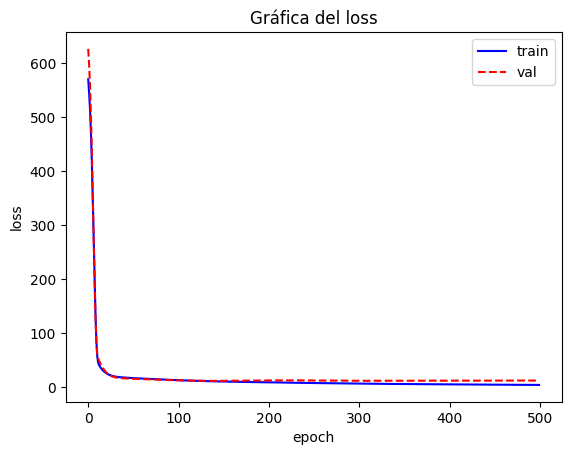

In [36]:
# Graficar el loss del conjunto de entrenamiento y de validación
plt.plot(model_2_fit.history['loss'], 'b', label='train')
plt.plot(model_2_fit.history['val_loss'], 'r--', label='val')
plt.title("Gráfica del loss")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()

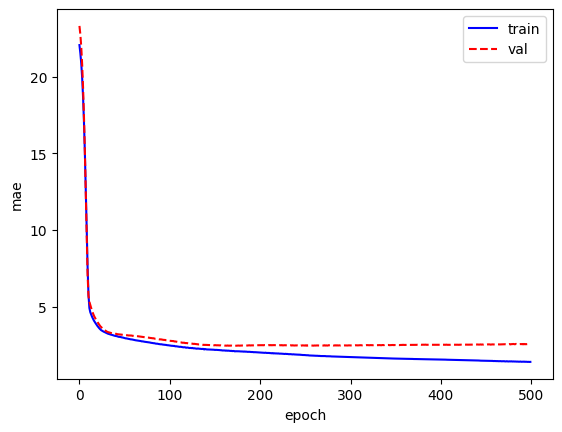

In [37]:
# Graficar métricas de error
plt.plot(model_2_fit.history['mae'], 'b', label='train')
plt.plot(model_2_fit.history['val_mae'], 'r--', label='val')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend()

## Código de solución estudiante 2

In [15]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [16]:
# Instancia de SelectKBest
selector = SelectKBest(score_func=f_regression, k=5)  # Las 5 mejores características

# Aplicar a los datos
X_selected = selector.fit_transform(train_data, train_labels)

# Obtener los índices de las features seleccionadas
selected_indices = selector.get_support(indices=True)
# Obtener los nombres de las features seleccionadas
selected_features = data.columns[selected_indices]

print("Variables seleccionadas:", selected_features)

Variables seleccionadas: Index(['CRIM', 'INDUS', 'NOX', 'TAX', 'LSTAT'], dtype='object')


C:\Users\insp3\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [17]:
train_data_selected = selector.transform(train_data)
test_data_selected = selector.transform(test_data)

In [18]:
tf.random.set_seed(123)

model2 = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(train_data_selected.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)
])

model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                384       
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2497 (9.75 KB)
Trainable params: 2497 (9.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
# Compilar el modelo
model2.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

# Entrenar el modelo
# argumentos: validation_split, shuffle, epochs, verbose
model2_fit = model2.fit(
    train_data_selected, train_labels, 
    validation_split=0.2, 
    shuffle=False,
    epochs=100, 
    batch_size=32, 
    verbose=0
)

# Evaluar el modelo en el conjunto de prueba
test_mse_score, test_mae_score = model2.evaluate(test_data_selected, test_labels)
print('Error cuadrático medio en el conjunto de prueba:', test_mse_score)
print('Error absoluto medio en el conjunto de prueba:', test_mae_score)

2/2 [==============================] - 0s 7ms/step - loss: 26.2711 - mae: 3.7979
Error cuadrático medio en el conjunto de prueba: 26.271141052246094
Error absoluto medio en el conjunto de prueba: 3.7978761196136475


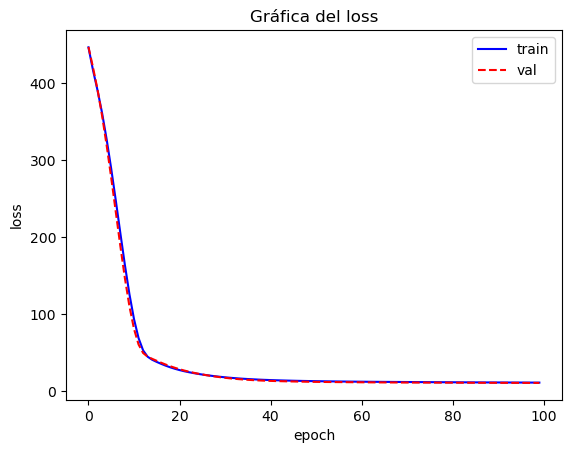

In [20]:
# Graficar el loss del conjunto de entrenamiento y de validación
plt.plot(model2_fit.history['loss'], 'b', label='train')
plt.plot(model2_fit.history['val_loss'], 'r--', label='val')
plt.title("Gráfica del loss")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()

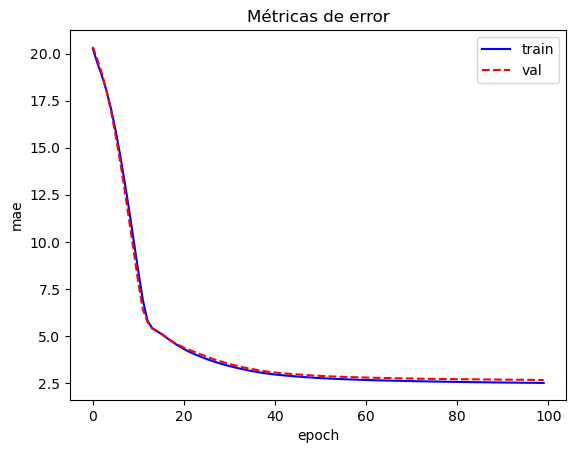

In [21]:
# Graficar métricas de error
plt.plot(model2_fit.history['mae'], 'b', label='train')
plt.plot(model2_fit.history['val_mae'], 'r--', label='val')
plt.title("Métricas de error")
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend()

### Ejercicio 3: Crear el mismo modelo pero en este caso implementar técnicas de regularización `EarlyStoppin` y `dropout`. Investigar como se pueden implementar estas estrategias en tensorflow.

Código de solución estudiante 1

In [42]:
# Definir la arquitectura de la red neuronal
tf.random.set_seed(123)
model_3 = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(NewTrain.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dropout(0.2),  # 20% de las neuronas
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1)
])

model_3.summary()

# Compilar el modelo
model_3.compile(optimizer='rmsprop', loss='mse', metrics=['mae']) 
# Se intento con adam sin embargo si cambio algo

# Entrenar el modelo
# argumentos: validation_split, shuffle, epochs, verbose
model_3_fit = model_3.fit(
    NewTrain, train_labels, 
    validation_split=0.2, 
    shuffle=False,
    epochs=150, 
    batch_size=32, 
    verbose=0
)

# Evaluar el modelo en el conjunto de prueba
test_mse_score, test_mae_score = model_2.evaluate(NewTest, test_labels)
print('Error cuadrático medio en el conjunto de prueba:', test_mse_score)
print('Error absoluto medio en el conjunto de prueba:', test_mae_score)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 64)                448       


                                                                 
 dense_12 (Dense)            (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_13 (Dense)            (None, 16)                528       
                                                                 
 dense_14 (Dense)            (None, 1)                 17        
                                                                 
Total params: 3073 (12.00 KB)
Trainable params: 3073 (12.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
4/4 [==============================] - 0s 3ms/step - loss: 17.9677 - mae: 3.0613
Error cuadrático medio en el conjunto de prueba: 17.96770668029785
Error absoluto medio en el conjunto de prueba: 3.061338186264038


In [43]:
from keras.callbacks import EarlyStopping

# Definir el EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',    # Métrica a monitorear (en este caso, la pérdida en el conjunto de validación)
    patience=10,            # Número de épocas sin mejora antes de detener el entrenamiento
    verbose=1,              # Verbosidad. 0 = silencioso, 1 = mensajes informativos
    restore_best_weights=True  # Restaurar los pesos del modelo a los mejores obtenidos durante el entrenamiento
)

# Entrenar el modelo con EarlyStopping
history = model_3.fit(
    NewTrain, train_labels, 
    validation_split=0.2, 
    shuffle=False,
    epochs=100, 
    batch_size=32, 
    verbose=0,
    callbacks=[early_stopping]  # Usar EarlyStopping como callback
)

# Evaluar el modelo en el conjunto de prueba
test_mse_score, test_mae_score = model_3.evaluate(NewTest, test_labels)
print('Error cuadrático medio en el conjunto de prueba:', test_mse_score)
print('Error absoluto medio en el conjunto de prueba:', test_mae_score)

Restoring model weights from the end of the best epoch: 35.
Epoch 45: early stopping
4/4 [==============================] - 0s 3ms/step - loss: 15.7946 - mae: 2.9315
Error cuadrático medio en el conjunto de prueba: 15.794644355773926
Error absoluto medio en el conjunto de prueba: 2.931450605392456


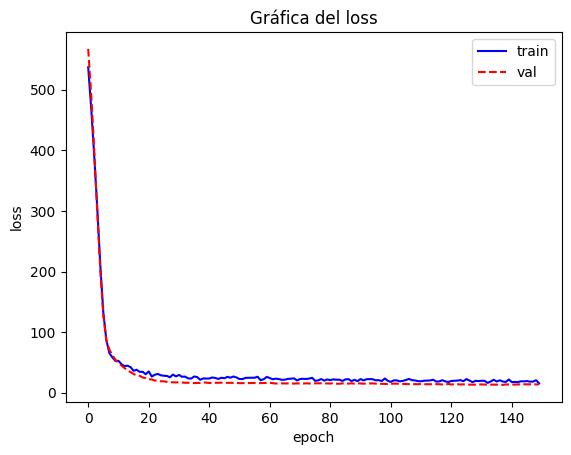

In [44]:
# Graficar el loss del conjunto de entrenamiento y de validación
plt.plot(model_3_fit.history['loss'], 'b', label='train')
plt.plot(model_3_fit.history['val_loss'], 'r--', label='val')
plt.title("Gráfica del loss")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()

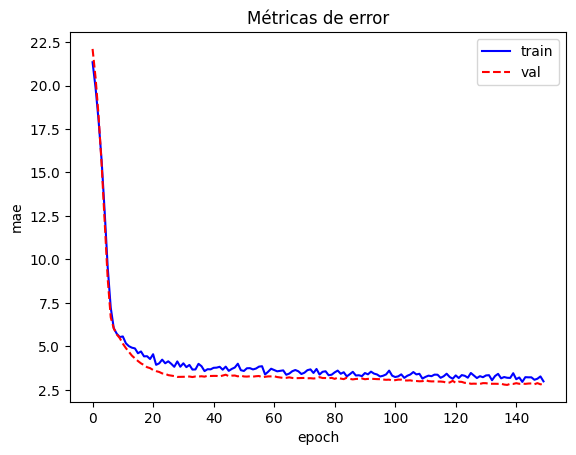

In [45]:
# Graficar métricas de error
plt.plot(model_3_fit.history['mae'], 'b', label='train')
plt.plot(model_3_fit.history['val_mae'], 'r--', label='val')
plt.title("Métricas de error")
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend()

- Con el adam nos decia que con 15 epocas, con el rmsprop nos dice que 45, de forma visual, la diferencia que existe entre ambas, en este último es un poco marginal realmente.

## Código de solución estudiante 2

In [22]:
# Establecer la semilla aleatoria para reproducibilidad
tf.random.set_seed(123)

# Callback para la regularización EarlyStopping
early_stopping = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

# Definir la arquitectura de la red neuronal con dropout
model3 = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(train_data_selected.shape[1],)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1)
])

# Compilar el modelo
model3.compile(optimizer='adam', loss='mse')

model3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 64)                384       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2497 (9.75 KB)
Trainable params: 2497 (9.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [23]:
# Compilar el modelo
model3.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

# Entrenar el modelo
model3_fit = model3.fit(
    train_data_selected, train_labels, 
    validation_split=0.2, 
    shuffle=False,
    epochs=600, 
    batch_size=32, 
    verbose=0,
    callbacks = [early_stopping]
)
# Evaluar el modelo en el conjunto de prueba
test_mse_score, test_mae_score = model3.evaluate(test_data_selected, test_labels)
print('Error cuadrático medio en el conjunto de prueba:', test_mse_score)
print('Error absoluto medio en el conjunto de prueba:', test_mae_score)

2/2 [==============================] - 0s 6ms/step - loss: 28.2437 - mae: 3.9466
Error cuadrático medio en el conjunto de prueba: 28.243745803833008
Error absoluto medio en el conjunto de prueba: 3.9465644359588623


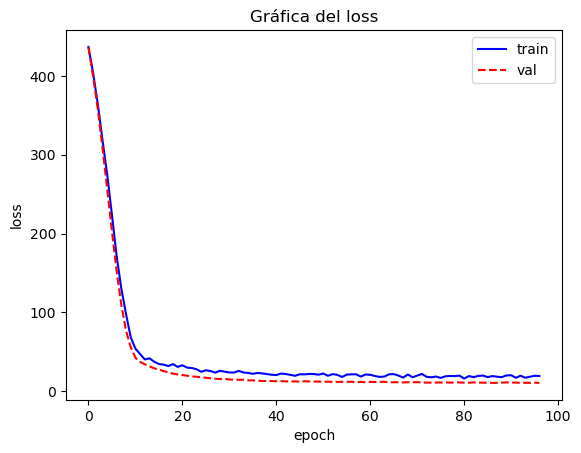

In [24]:
# Graficar el loss del conjunto de entrenamiento y de validación
plt.plot(model3_fit.history['loss'], 'b', label='train')
plt.plot(model3_fit.history['val_loss'], 'r--', label='val')
plt.title("Gráfica del loss")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()

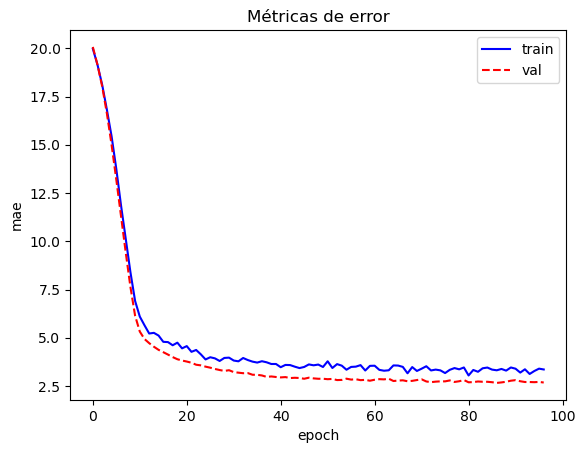

In [25]:
# Graficar métricas de error
plt.plot(model3_fit.history['mae'], 'b', label='train')
plt.plot(model3_fit.history['val_mae'], 'r--', label='val')
plt.title("Métricas de error")
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend()